In [ ]:
def MahalanobisDist(x, y):
    covariance_xy = np.cov(x,y, rowvar=0)
    inv_covariance_xy = np.linalg.inv(covariance_xy)
    xy_mean = np.mean(x),np.mean(y)
    x_diff = np.array([x_i - xy_mean[0] for x_i in x])
    y_diff = np.array([y_i - xy_mean[1] for y_i in y])
    diff_xy = np.transpose([x_diff, y_diff])
    
    md = []
    for i in range(len(diff_xy)):
        md.append(np.sqrt(np.dot(np.dot(np.transpose(diff_xy[i]),inv_covariance_xy),diff_xy[i])))
    return md

In [ ]:
MahalanobisDist(x,y)

In [ ]:
def MD_removeOutliers(x, y):
    MD = MahalanobisDist(x, y)
    threshold = np.mean(MD) * 1.5 # adjust 1.5 accordingly 
    nx, ny, outliers = [], [], []
    for i in range(len(MD)):
        if MD[i] <= threshold:
            nx.append(x[i])
            ny.append(y[i])
        else:
            outliers.append(i) # position of removed pair
    return (np.array(nx), np.array(ny), np.array(outliers))

In [ ]:
print 'x:', x
print 'y:', y
MD_removeOutliers(x,y)

In [5]:
covCircle = np.array([[1, 0.], [0., 1.]])
covCircle

array([[ 1.,  0.],
       [ 0.,  1.]])

In [6]:
circle = np.random.multivariate_normal([0, 0], covCircle, 1000)
circle

array([[ 0.08932374, -0.45793839],
       [ 0.20108188,  0.37761979],
       [-0.47796064, -0.30509328],
       ..., 
       [ 2.15853256,  0.72616998],
       [-1.57933098,  1.86105663],
       [ 0.51186841, -1.55774274]])

Test and Example

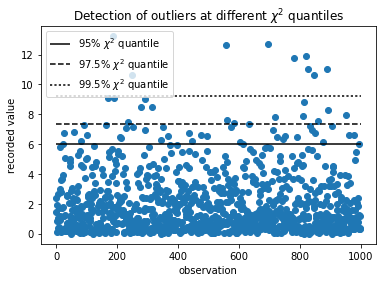

In [4]:
import numpy as np
import scipy.stats as stats
import scipy.spatial.distance as distance
import matplotlib.pyplot as plt
chi2 = stats.chi2
np.random.seed(111)


#covariance matrix: X and Y are normally distributed with std of 1
#and are independent one of another
covCircle = np.array([[1, 0.], [0., 1.]])
circle = np.random.multivariate_normal([0, 0], covCircle, 1000) #1000 points around [0, 0]
mahalanobis = lambda p: distance.mahalanobis(p, [0, 0], covCircle.T)
d = np.array(map(mahalanobis, circle)) #Mahalanobis distance values for the 1000 points
d2 = d ** 2 #MD squared

degrees_of_freedom = 2

x = range( len( d2 ))

plt.subplot(111)

plt.scatter( x, d2 )

plt.hlines( chi2.ppf(0.95, degrees_of_freedom), 0, len(d2), label ="95% $\chi^2$ quantile", linestyles = "solid" ) 
plt.hlines( chi2.ppf(0.975, degrees_of_freedom), 0, len(d2), label ="97.5% $\chi^2$ quantile", linestyles="dashed" ) 
plt.hlines( chi2.ppf(0.99, degrees_of_freedom), 0, len(d2), label ="99.5% $\chi^2$ quantile", linestyles = "dotted" )

plt.legend()
plt.ylabel("recorded value")
plt.xlabel("observation")
plt.title( 'Detection of outliers at different $\chi^2$ quantiles' )

plt.show()